<a href="https://colab.research.google.com/github/MARIAFER0596/Proyecto-Gesti-n-y-Almacenamiento-de-Datos-equipo-4/blob/main/Proyecto_GYAD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **EXTRACCION**

In [96]:
#Instalaciones
!pip install unidecode
!pip install mysql-connector

In [97]:
import pandas as pd
import matplotlib.pyplot as plt
from unidecode import unidecode
import mysql.connector

In [98]:


import pandas as pd

# URLs de los CSVs
url_drug = "https://raw.githubusercontent.com/MARIAFER0596/Proyecto-Gesti-n-y-Almacenamiento-de-Datos-equipo-4/refs/heads/main/Datos/Drug_Disorder.csv"
url_mental = "https://raw.githubusercontent.com/MARIAFER0596/Proyecto-Gesti-n-y-Almacenamiento-de-Datos-equipo-4/refs/heads/main/Datos/Mental_Disorder.csv"
url_salud = "https://raw.githubusercontent.com/MARIAFER0596/Proyecto-Gesti-n-y-Almacenamiento-de-Datos-equipo-4/refs/heads/main/Datos/Salud_Mental_20250904.csv"

# Leer los CSVs directamente desde GitHub
df1 = pd.read_csv(url_drug)
df2  = pd.read_csv(url_mental)
df3= pd.read_csv(url_salud)

# Mostrar las primeras filas de cada dataframe
print(df1.head())
print(df2.head())
print(df3.head())

dfs = [df1, df2, df3]

#Value = Estimación del indicador
#Value Low y Up = Rango de incertidumbre, no se pueden transformar a flotantes

  Iso3 Location Name AMRO subregions              Causename Eng  Year   Sex  \
0  ARG     Argentina   Southern Cone  Amphetamine use disorders  2020  Male   
1  ARG     Argentina   Southern Cone  Amphetamine use disorders  2020  Male   
2  ARG     Argentina   Southern Cone  Amphetamine use disorders  2020  Male   
3  ARG     Argentina   Southern Cone  Amphetamine use disorders  2020  Male   
4  ARG     Argentina   Southern Cone  Amphetamine use disorders  2020  Male   

    Age group                         Measure Name En Metric Name En  Value  \
0   0-4 years                                  Deaths           Rate    0.0   
1   0-4 years  Disability-Adjusted Life Years (DALYs)           Rate    0.0   
2   0-4 years      Years Lived with Disability (YLDs)           Rate    0.0   
3   0-4 years               Years of Life Lost (YLLs)           Rate    0.0   
4  0-14 years                                  Deaths           Rate    0.0   

   Value Low  Value Up  
0        0.0       0.0  


# **TRANSFORMACION DE LOS DATOS**

In [99]:
import pandas as pd

# Función para estandarizar nombres de columnas
def limpiar_columnas(df):
    df.columns = (
        df.columns
        .str.strip()                       # eliminar espacios al inicio/fin
        .str.lower()                       # todo en minúsculas
        .str.replace(" ", "_")             # reemplazar espacios por _
        .str.replace(r"[^a-z0-9_]", "", regex=True)  # eliminar caracteres no válidos
    )
    return df

# Función para transformar y guardar los DataFrames
def transform_and_save(dfs):
    for i, df in enumerate(dfs, start=1):
        #  Limpieza básica
        df.drop_duplicates(inplace=True)
        df.dropna(inplace=True)

        # Estandarizar nombres de columnas
        df = limpiar_columnas(df)

        #  Convertir columnas de año si existen
        if 'year' in df.columns:
            df['year'] = df['year'].astype(int)
        elif 'año_diagnostico' in df.columns:
            df['año_diagnostico'] = df['año_diagnostico'].astype(int)

        # Guardar cada DataFrame limpio como CSV
        nombre_archivo = f"tabla_{i}_limpia.csv"
        df.to_csv(nombre_archivo, index=False, encoding='utf-8')
        print(f" CSV guardado: {nombre_archivo}")


def convertir_numericas(df):
    for col in df.columns:
        if df[col].dtype == "object":
            muestra = df[col].dropna().astype(str).head(50)
            if muestra.str.replace(r"[0-9.,-]", "", regex=True).str.strip().eq("").mean() > 0.8:
                # Limpiar separadores de miles y comas decimales
                df[col] = (
                    df[col]
                    .astype(str)
                    .str.replace(".", "", regex=False)  # quitar separador de miles
                    .str.replace(",", ".", regex=False)  # cambiar coma decimal por punto
                )
                df[col] = pd.to_numeric(df[col], errors="coerce")
    return df



In [100]:

transform_and_save([df1, df2, df3])

# Cargar las tablas
tabla1 = pd.read_csv("tabla_1_limpia.csv")
tabla2 = pd.read_csv("tabla_2_limpia.csv")
tabla3 = pd.read_csv("tabla_3_limpia.csv")
# Convertir columnas numéricas
tabla1 = convertir_numericas(tabla1)
tabla2 = convertir_numericas(tabla2)
tabla3 = convertir_numericas(tabla3)

tabla1.head(20)



 CSV guardado: tabla_1_limpia.csv
 CSV guardado: tabla_2_limpia.csv
 CSV guardado: tabla_3_limpia.csv


,iso3,location_name,amro_subregions,causename_eng,year,sex,age_group,measure_name_en,metric_name_en,value,value_low,value_up
0,ARG,Argentina,Southern Cone,Amphetamine use disorders,2020,Male,0-4 years,Deaths,Rate,0.00,0.00,0.00
1,ARG,Argentina,Southern Cone,Amphetamine use disorders,2020,Male,0-4 years,Disability-Adjusted Life Years (DALYs),Rate,0.00,0.00,0.00
2,ARG,Argentina,Southern Cone,Amphetamine use disorders,2020,Male,0-4 years,Years Lived with Disability (YLDs),Rate,0.00,0.00,0.00
3,ARG,Argentina,Southern Cone,Amphetamine use disorders,2020,Male,0-4 years,Years of Life Lost (YLLs),Rate,0.00,0.00,0.00
4,ARG,Argentina,Southern Cone,Amphetamine use disorders,2020,Male,0-14 years,Deaths,Rate,0.00,0.00,0.00
5,ARG,Argentina,Southern Cone,Amphetamine use disorders,2020,Male,0-14 years,Disability-Adjusted Life Years (DALYs),Rate,0.00,0.00,0.00
6,ARG,Argentina,Southern Cone,Amphetamine use disorders,2020,Male,0-14 years,Years Lived with Disability (YLDs),Rate,0.00,0.00,0.00
7,ARG,Argentina,Southern Cone,Amphetamine use disorders,2020,Male,0-14 years,Years of Life Lost (YLLs),Rate,0.00,0.00,0.00
8,ARG,Argentina,Southern Cone,Amphetamine use disorders,2020,Male,0-19 years,Deaths,Rate,0.00,0.00,0.00
9,ARG,Argentina,Southern Cone,Amphetamine use disorders,2020,Male,0-19 years,Disability-Adjusted Life Years (DALYs),Rate,2.13,0.22,4.96


In [101]:
tabla2.head(20)


,iso3,location_name,amro_subregions,year,sex,age_group,measure_name_en,metric_name_en,value,value_low,value_up
0,ARG,Argentina,Southern Cone,2020,Male,0-4 years,Disability-Adjusted Life Years (DALYs),Rate,35315.00000,21578.00000,52760.00000
1,ARG,Argentina,Southern Cone,2020,Male,0-4 years,Years Lived with Disability (YLDs),Rate,35315.00000,21578.00000,52760.00000
2,ARG,Argentina,Southern Cone,2020,Male,0-14 years,Disability-Adjusted Life Years (DALYs),Rate,1.04849,57809.00000,1.68293
3,ARG,Argentina,Southern Cone,2020,Male,0-14 years,Years Lived with Disability (YLDs),Rate,1.04849,57809.00000,1.68293
4,ARG,Argentina,Southern Cone,2020,Male,0-19 years,Disability-Adjusted Life Years (DALYs),Rate,1.38957,76865.00000,2.22076
5,ARG,Argentina,Southern Cone,2020,Male,0-19 years,Years Lived with Disability (YLDs),Rate,1.38776,76684.00000,2.21895
6,ARG,Argentina,Southern Cone,2020,Male,0-24 years,Disability-Adjusted Life Years (DALYs),Rate,1.61227,90167.00000,2.57120
7,ARG,Argentina,Southern Cone,2020,Male,0-24 years,Years Lived with Disability (YLDs),Rate,1.61006,89946.00000,2.56899
8,ARG,Argentina,Southern Cone,2020,Male,0-27 days,Disability-Adjusted Life Years (DALYs),Rate,32022.00000,20319.00000,47107.00000
9,ARG,Argentina,Southern Cone,2020,Male,0-27 days,Years Lived with Disability (YLDs),Rate,32022.00000,20319.00000,47107.00000


In [102]:
tabla3.head(20)

,diagnostico_ingreso,codigo_dx_ingreso,menor_a_1,de_1_a_4,de_5_a_9,de_10_a_14,de_15_a_19,de_20_a_49,de_50_a_64,65_y_mas,total,ao_diagnstico
0,TRASTORNO MIXTO DE ANSIEDAD Y DEPRESION,F412,0,0,0,10,9,31,8,2,60,2023
1,EPISODIO DEPRESIVO GRAVE SIN SINTOMAS PSICOTICOS,F322,0,0,0,10,10,31,4,3,58,2023
2,EPISODIO DEPRESIVO MODERADO,F321,0,0,0,3,2,11,1,4,21,2023
3,"TRASTORNO AFECTIVO BIPOLAR, NO ESPECIFICADO",F319,0,0,0,1,1,12,4,1,19,2023
4,"ESQUIZOFRENIA, NO ESPECIFICADA",F209,0,0,0,1,0,14,0,0,15,2023
5,"TRASTORNO AFECTIVO BIPOLAR, EPISODIO MANIACO P...",F312,0,0,0,0,0,9,4,2,15,2023
6,"TRASTORNO AFECTIVO BIPOLAR, EPISODIO MANIACO P...",F311,0,0,0,0,0,10,2,1,13,2023
7,"DELIRIO, NO ESPECIFICADO",F059,0,0,0,0,0,0,1,11,12,2023
8,ESQUIZOFRENIA PARANOIDE,F200,0,0,0,0,0,11,1,0,12,2023
9,"TRASTORNO DE ANSIEDAD , NO ESPECIFICADO",F419,0,0,1,4,0,5,0,0,10,2023


In [103]:
import pandas as pd

# === Análisis Exploratorio por separado ===
# ------------------------------------------

# Estandarizar columnas antes del análisis
tabla1 = limpiar_columnas(tabla1)
tabla2 = limpiar_columnas(tabla2)
tabla3 = limpiar_columnas(tabla3)

# ----------------------
# Tabla 1: Datos epidemiológicos con causas
# ----------------------
print("\n--- TABLA 1 ---")
print("Dimensiones:", tabla1.shape)
print("\nTipos de datos:\n", tabla1.dtypes)
print("\nValores nulos:\n", tabla1.isnull().sum())
print("\nResumen estadístico:\n", tabla1.describe(include='all'))

print("\nTop 5 causas más frecuentes:")
print(tabla1['causename_eng'].value_counts().head())

print("\nDistribución por sexo:")
print(tabla1['sex'].value_counts())

print("\nAños disponibles:")
print(tabla1['year'].unique())




--- TABLA 1 ---
Dimensiones: (16320, 12)

Tipos de datos:
 iso3                object
location_name       object
amro_subregions     object
causename_eng       object
year                 int64
sex                 object
age_group           object
measure_name_en     object
metric_name_en      object
value              float64
value_low          float64
value_up           float64
dtype: object

Valores nulos:
 iso3               0
location_name      0
amro_subregions    0
causename_eng      0
year               0
sex                0
age_group          0
measure_name_en    0
metric_name_en     0
value              0
value_low          0
value_up           0
dtype: int64

Resumen estadístico:
          iso3 location_name amro_subregions              causename_eng  \
count   16320         16320           16320                      16320   
unique      5             5               1                          6   
top       ARG     Argentina   Southern Cone  Amphetamine use disorders   
f

In [104]:
# ----------------------
# Tabla 2: Datos epidemiológicos (sin causa)
# ----------------------
print("\n--- TABLA 2 ---")
print("Dimensiones:", tabla2.shape)
print("\nTipos de datos:\n", tabla2.dtypes)
print("\nValores nulos:\n", tabla2.isnull().sum())
print("\nResumen estadístico:\n", tabla2.describe(include='all'))

print("\nMedidas disponibles:")
print(tabla2['measure_name_en'].value_counts())

print("\nDistribución por sexo:")
print(tabla2['sex'].value_counts())

print("\nAños disponibles:")
print(tabla2['year'].unique())



--- TABLA 2 ---
Dimensiones: (1360, 11)

Tipos de datos:
 iso3                object
location_name       object
amro_subregions     object
year                 int64
sex                 object
age_group           object
measure_name_en     object
metric_name_en      object
value              float64
value_low          float64
value_up           float64
dtype: object

Valores nulos:
 iso3               0
location_name      0
amro_subregions    0
year               0
sex                0
age_group          0
measure_name_en    0
metric_name_en     0
value              0
value_low          0
value_up           0
dtype: int64

Resumen estadístico:
         iso3 location_name amro_subregions         year   sex  age_group  \
count   1360          1360            1360  1360.000000  1360       1360   
unique     5             5               1          NaN     2         34   
top      ARG     Argentina   Southern Cone          NaN  Male  0-4 years   
freq     272           272            1360

In [105]:

# ----------------------
# Tabla 3: Diagnósticos hospitalarios
# ----------------------
print("\n--- TABLA 3 ---")
print("Dimensiones:", tabla3.shape)
print("\nTipos de datos:\n", tabla3.dtypes)
print("\nValores nulos:\n", tabla3.isnull().sum())
print("\nResumen estadístico:\n", tabla3.describe(include='all'))

print("\nTop 5 diagnósticos más comunes:")
print(tabla3['diagnostico_ingreso'].value_counts().head())

print("\nAño(s) de diagnóstico:")
if 'ao_diagnstico' in tabla3.columns:
    print(tabla3['ao_diagnstico'].unique())


--- TABLA 3 ---
Dimensiones: (142, 12)

Tipos de datos:
 diagnostico_ingreso    object
codigo_dx_ingreso      object
menor_a_1               int64
de_1_a_4                int64
de_5_a_9                int64
de_10_a_14              int64
de_15_a_19              int64
de_20_a_49              int64
de_50_a_64              int64
65_y_mas                int64
total                   int64
ao_diagnstico           int64
dtype: object

Valores nulos:
 diagnostico_ingreso    0
codigo_dx_ingreso      0
menor_a_1              0
de_1_a_4               0
de_5_a_9               0
de_10_a_14             0
de_15_a_19             0
de_20_a_49             0
de_50_a_64             0
65_y_mas               0
total                  0
ao_diagnstico          0
dtype: int64

Resumen estadístico:
                                       diagnostico_ingreso codigo_dx_ingreso  \
count                                                 142               142   
unique                                                 99

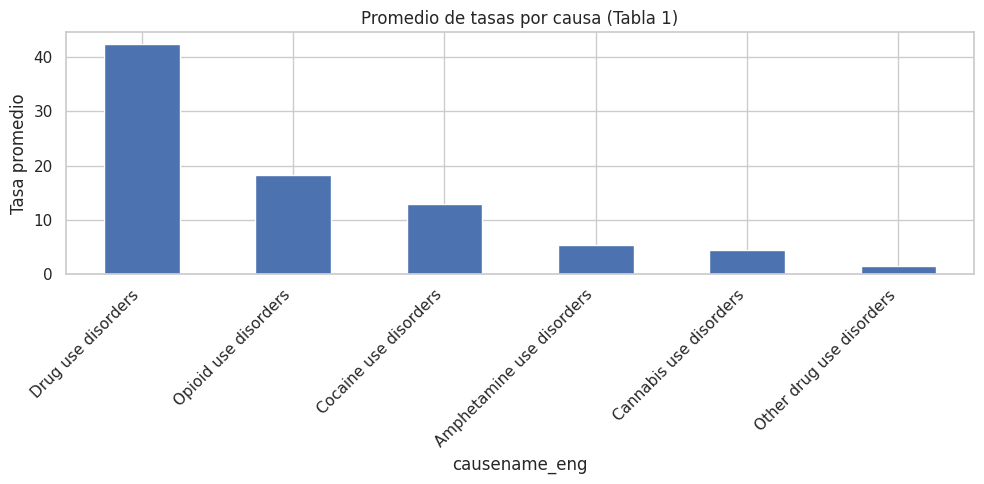

In [106]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Configuración de estilo
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10,5)

# ==============================
# TABLA 1 - EDA
# ==============================

# Promedio de tasas por causa
tabla1.groupby("causename_eng")["value"].mean().sort_values(ascending=False).plot(
    kind="bar", title="Promedio de tasas por causa (Tabla 1)"
)
plt.ylabel("Tasa promedio")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()




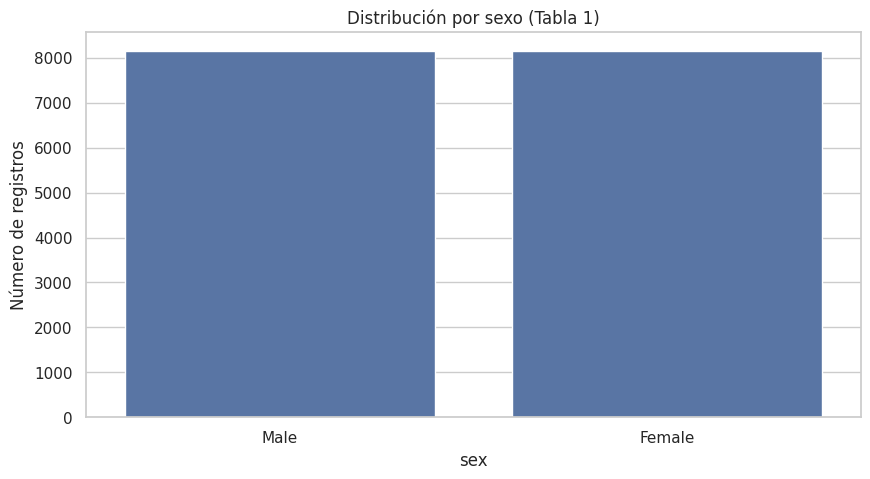

In [107]:
# Distribución por sexo
sns.countplot(x="sex", data=tabla1)
plt.title("Distribución por sexo (Tabla 1)")
plt.ylabel("Número de registros")
plt.show()


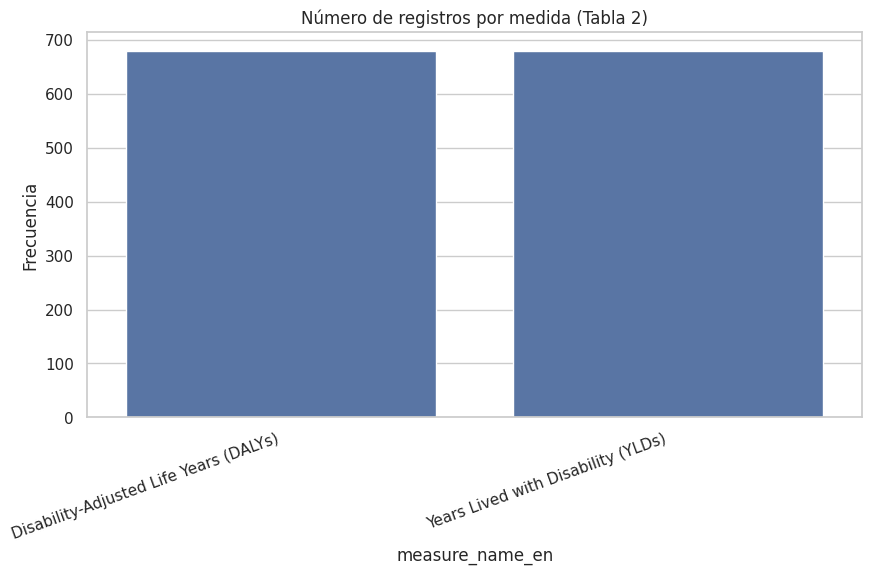

In [108]:

# ==============================
# TABLA 2 - EDA
# ==============================

# Registros por medida
sns.countplot(x="measure_name_en", data=tabla2)
plt.title("Número de registros por medida (Tabla 2)")
plt.ylabel("Frecuencia")
plt.xticks(rotation=20, ha="right")
plt.show()




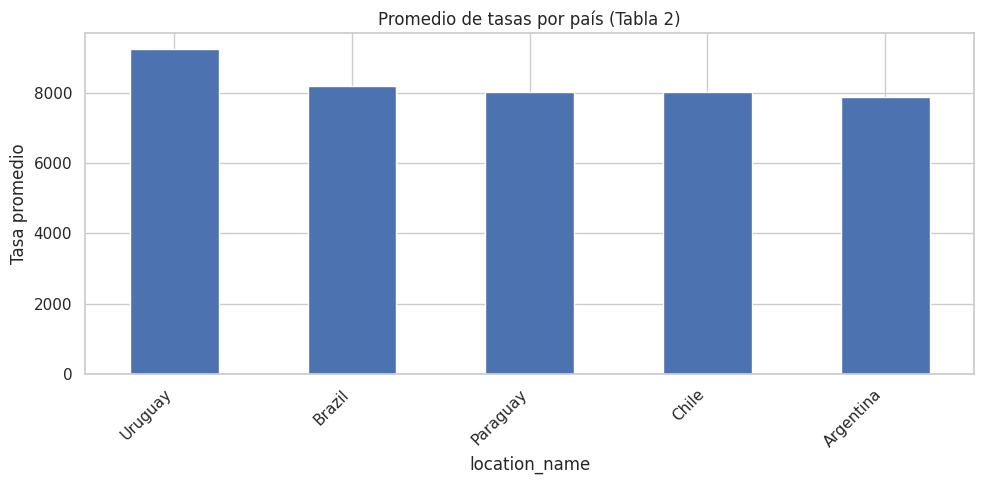

In [109]:

# Promedio de valores por país
tabla2.groupby("location_name")["value"].mean().sort_values(ascending=False).plot(
    kind="bar", title="Promedio de tasas por país (Tabla 2)"
)
plt.ylabel("Tasa promedio")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

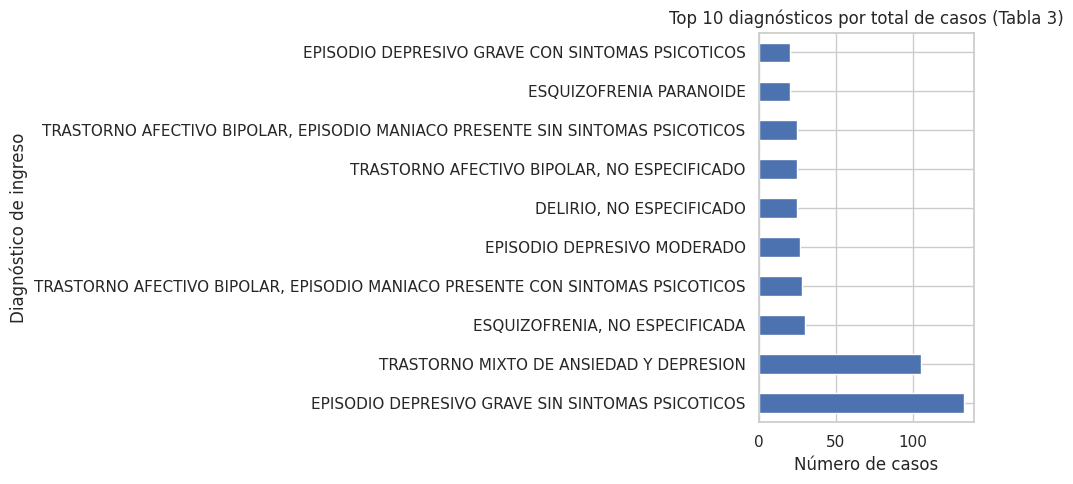

In [110]:
# ==============================
# TABLA 3 - EDA
# ==============================

# Top 10 diagnósticos más frecuentes
tabla3.groupby("diagnostico_ingreso")["total"].sum().sort_values(ascending=False).head(10).plot(
    kind="barh", title="Top 10 diagnósticos por total de casos (Tabla 3)"
)
plt.xlabel("Número de casos")
plt.ylabel("Diagnóstico de ingreso")
plt.tight_layout()
plt.show()



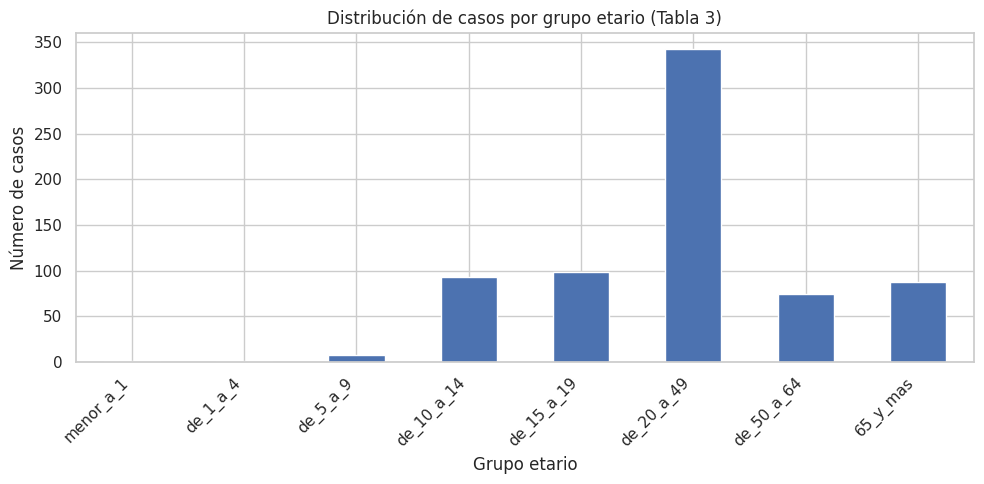

In [111]:
# Distribución de casos por grupo etario
cols_edades = ["menor_a_1","de_1_a_4","de_5_a_9","de_10_a_14","de_15_a_19",
               "de_20_a_49","de_50_a_64","65_y_mas"]

tabla3[cols_edades].sum().plot(
    kind="bar", title="Distribución de casos por grupo etario (Tabla 3)"
)
plt.ylabel("Número de casos")
plt.xlabel("Grupo etario")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

# **CARGA DE DATOS EN BASE DE DATOS MYSQL**

In [115]:
import mysql.connector
import pandas as pd
import os

# ===========================
# Conexión a MySQL
# ===========================
conn = mysql.connector.connect(
    host="localhost",
    user="root",
    password="",
    database="proyectofinal"
)
cursor = conn.cursor()

# ===========================
# Crear tablas
# ===========================
cursor.execute("""
   CREATE TABLE IF NOT EXISTS Drug_Disorder(
    iso3 VARCHAR(10),
    location_name VARCHAR(100),
    amro_subregions VARCHAR(50),
    causename_eng VARCHAR(200),
    year INT,
    sex VARCHAR(10),
    age_group VARCHAR(30),
    measure_name_en VARCHAR(100),
    value VARCHAR(30),
    value_low VARCHAR(30),
    value_up VARCHAR(30)
   );
""")

cursor.execute("""
   CREATE TABLE IF NOT EXISTS Mental_Disorder(
    iso3 VARCHAR(10),
    location_name VARCHAR(100),
    amro_subregions VARCHAR(50),
    year INT,
    sex VARCHAR(10),
    age_group VARCHAR(30),
    measure_name_en VARCHAR(100),
    metric_name_en VARCHAR(100),
    value VARCHAR(30),
    value_low VARCHAR(30),
    value_up VARCHAR(30)
   );
""")

cursor.execute("""
   CREATE TABLE IF NOT EXISTS Neurological_Conditions(
    diagnostico_ingreso VARCHAR(200),
    codigo_dx_ingreso VARCHAR(50),
    menor_a_1 VARCHAR(20),
    de_1_a_4 VARCHAR(20),
    de_5_a_9 VARCHAR(20),
    de_10_a_14 VARCHAR(20),
    de_15_a_19 VARCHAR(20),
    de_20_a_49 VARCHAR(20),
    de_50_a_64 VARCHAR(20),
    _65_y_mas VARCHAR(20),
    total VARCHAR(20),
    ao_diagnstico VARCHAR(20)
   );
""")

conn.commit()

# ===========================
# Cargar CSV (solo 1000 filas)
# ===========================
ruta = r"C:\Users\migue\Downloads\CSV"

df1 = pd.read_csv(os.path.join(ruta, "tabla_1_limpia.csv")).head(10)
df2 = pd.read_csv(os.path.join(ruta, "tabla_2_limpia.csv")).head(10)
df3 = pd.read_csv(os.path.join(ruta, "tabla_3_limpia.csv")).head(10)

# ===========================
# Inserts
# ===========================
insert_drug = """
INSERT INTO Drug_Disorder
(iso3, location_name, amro_subregions, causename_eng, year, sex, age_group,
 measure_name_en, value, value_low, value_up)
VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s)
"""


insert_mental = """
INSERT INTO Mental_Disorder
(iso3, location_name, amro_subregions, year, sex, age_group,
 measure_name_en, metric_name_en, value, value_low, value_up)
VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s)
"""

insert_neuro = """
INSERT INTO Neurological_Conditions
(diagnostico_ingreso, codigo_dx_ingreso, menor_a_1, de_1_a_4, de_5_a_9,
 de_10_a_14, de_15_a_19, de_20_a_49, de_50_a_64, _65_y_mas, total, ao_diagnstico)
VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s)
"""

# ===========================
# Ejecutar inserts
# ===========================

cursor.executemany(insert_mental, df2.values.tolist())
cursor.executemany(insert_neuro, df3.values.tolist())

conn.commit()
cursor.close()
conn.close()

print("✅ Datos insertados (máx. 10 por tabla)")




InterfaceError: 2003: Can't connect to MySQL server on 'localhost:3306' (111 Connection refused)